# Manufacturing in India vs. China

## A. Introduction

### A.1. Description & Disscusion of the Background

The analysis is on the comparison on the top  richest cities in both China and India.  

When it comes to choosing the best overseas manufacturer in Asia, two of the most common places for manufacturing are India and China. Both countries have very dynamic manufacturing capabilities and unique economic landscapes with proven skills, strengths and weaknesses that make both countries viable choices. However, it is imperative to weigh your choices carefully by considering specific external factors that will have an impact on your business.


#### A description of the data and how it will be used to solve the problem?  
##### Key Factors that Influence India vs. China’s Manufacturing  
Manufacturing wages,Labor force size and skill level,Logistics and infrastructure of India and China,Foreign Language Skills,Ease of Doing Business in India vs. China.  
These factors are used to analyse and compare the two contries their current position and gives some insight how a new business can move in easily.
Also pick one one of the city from each country based on the GDP and look for the similarity and disimilarity using Foursquare.
This can give the any business the culture and idea to invest.


In [2]:
#import the required library
import pandas as pd
import numpy as np
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
#%matplotlib.inline

### A.2. Data Description

To consider the problem we can list the datas as below:

1. I used the reference from Wikipedia for the GDP details and WorldBank rating on the countries on various business related facotrs.
2. I used the Wikipedia to get the list of notable companies in both the country India and China
3. I used Forsquare API to get the most common venues of the city Mumbai and Shanghai
4. I used Google Map, ‘Search Nearby’ option to get the center coordinates of the each specific places.

In [3]:
# The code was removed by Watson Studio for sharing.

,Country,DB Rank,DB score (0 to 100),Starting a Business rank,Getting Electricity rank,Getting Credit rank,Paying Taxes rank,Trading Borders rank,Enforcing Contracts rank
0,Cambodia,144,53.8,187,146,25,138,118,182
1,China,31,77.9,28,14,64,114,65,6
2,India,63,71.0,136,22,25,115,68,163
3,Thailand,21,80.1,47,6,48,68,62,37
4,Vietnam,70,69.8,115,27,25,109,104,68


In [4]:
# Dataset for the Top 10 Cities
#in_html = 'https://en.wikipedia.org/wiki/List_of_Indian_cities_by_GDP_per_capita'
#ch_html = 'https://en.wikipedia.org/wiki/List_of_Chinese_prefecture-level_cities_by_GDP'
ch_html ='https://www.chinacheckup.com/blogs/articles/china-city-economies'
df_in = df_data_1
df_ch = pd.read_html(ch_html)

In [5]:
#World Bank provided ranking based on various factors for all countries
Labour = Labour[((Labour['Country']=='India')| (Labour['Country']=='China'))]
Logistics = Logistics[((Logistics['Country']=='India')| (Logistics['Country']=='China'))]
Business = Business[((Business['Country']=='India')| (Business['Country']=='China'))]

In [6]:
#The Labour,Logistics and Business ease data cleaning
Labour.set_index('Country',inplace=True)
Labour.drop('Human capital score (O to 100)',1,inplace=True)
Logistics.set_index('Country',inplace=True)
Business.set_index('Country',inplace=True)
Logistics.drop('LPI score',1,inplace=True)
Business.drop('DB score (0 to 100)',1,inplace=True)

In [7]:
#Dataset based on the GDP for both India and China Cities
China_GDP=df_ch[0]
India_GDP=df_in

In [8]:
#Data preprocessing for the India GDP dataset
India_GDP['GDP (PPP)'] = India_GDP['GDP (PPP)'].str[1:]
India_GDP['GDP (PPP)'] = India_GDP['GDP (PPP)'].str[:-8]
India_GDP['GDP (PPP)'] = India_GDP['GDP (PPP)'].astype(float)

In [9]:
#Data preprocessing for the China GDP dataset
China_GDP['GDP (2019, Q1-Q2 data)'] = China_GDP['GDP (2019, Q1-Q2 data)'].str[4:]
China_GDP['GDP (2019, Q1-Q2 data)'] = China_GDP['GDP (2019, Q1-Q2 data)'].str[:-2]
China_GDP.drop('Name in Chinese',1,inplace=True)

#Only select the row where the reporte is != reporte
China_GDP2=China_GDP[China_GDP['GDP (2019, Q1-Q2 data)']!='reporte']
China_GDP2['GDP (2019, Q1-Q2 data)']=China_GDP2['GDP (2019, Q1-Q2 data)'].astype(float)

#Conversion rate form CNY to USD
Avg_rate = 0.14265
China_GDP2['GDP in USD'] = China_GDP2['GDP (2019, Q1-Q2 data)'] * Avg_rate

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [10]:
### Lets pick the city of both the country who have GDP more the 50
China_GDP3 = China_GDP2[['City','GDP in USD']]
China_GDP3.rename(columns={'City': "China City"},inplace=True)
India_GDP.rename(columns={'GDP (PPP)': 'GDP in USD'},inplace=True)
China_GDP3 = China_GDP3[(China_GDP3['GDP in USD']>=50)]
India_GDP = India_GDP[(India_GDP['GDP in USD']>=50)]

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [11]:
#Sort the first 9 cities in desending order
India_GDP = India_GDP.sort_values(by='GDP in USD',ascending=False).head(9)
China_GDP3 = China_GDP3.sort_values(by='GDP in USD',ascending=False).head(9)

## Understading the ranking between China and India on various Business factors

### Labor force size and skill level
Among the many manufacturing locations opposing China, India is unmatched in the size of its labor force. According to September 2019 data from the World Bank, India’s labor force numbers about 519 million. China’s labor force is still much larger with 783 million strong. But Indonesia’s labor force, with 134 million workers, is a distant third for the region.

India falls behind many of its neighbors with regard to factors the World Economic Forum use to rank countries in their human capital report. India ranks 103rd overall, while China ranks 34th.

One area where India suffers a deficiency is in “know-how”, which includes the breadth and depth of specialized skills at work. We see this directly at play in the quality and complexity of the country’s top export products. This metric also measures employers’ perceived ease at filling job vacancies.

<Figure size 432x288 with 0 Axes>

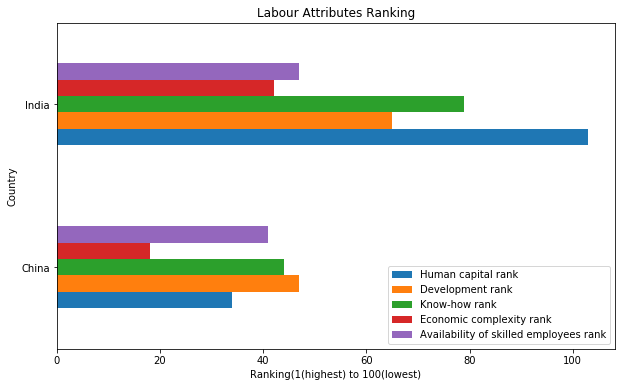

In [12]:
fig = plt.figure()
ax1=Labour.plot(kind='barh', figsize=(10, 6))
ax1.set_title('Labour Attributes Ranking')
ax1.set_xlabel('Ranking(1(highest) to 100(lowest)')
plt.show()

### Logistics and infrastructure of India and China

The World Bank publishes its Logistical Performance Index (LPI) every two years, ranking countries according to several criteria, including:

Efficiency of the customs clearing process
Quality of infrastructure
Ease of arranging shipments at competitive prices
Competence and quality of logical services
Ability to track and trace shipments; and
Timeliness of shipments & ability to meet delivery deadlines
China ranks 26th among 160 countries studied, while India ranks behind China and others in Asia at 44th. India lags behind China in two areas, in particular—timeliness and quality of infrastructure.


Similar constraints impact India’s railways. By the end of 2018, China boasted two thirds of the world’s total high-speed railway lines with a network spanning 29,000 kilometers and supporting trains capable of reaching speeds of 250km/hour. Meanwhile, the average speed of passenger and freight trains in India is limited to 60km/hour and 25km/hour, respectively.

These factors greatly limit the flow of traffic and the capacity of India’s roads and railways to support commercial trade.

India’s government is investing heavily in strengthening infrastructure, however. The government reportedly spent US$1 trillion on infrastructure between 2008 and 2017 and plans to invest about USD 1.4 trillion more in the next five years.

<Figure size 432x288 with 0 Axes>

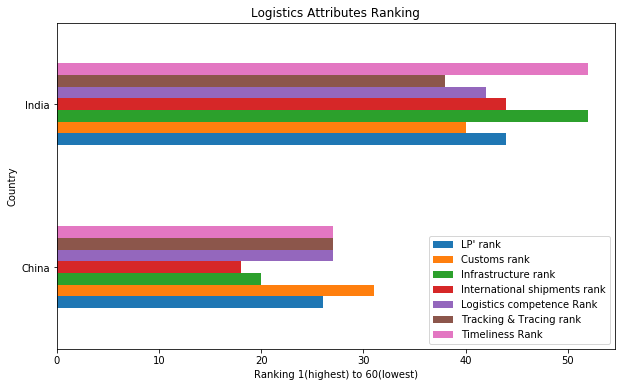

In [13]:
plt.figure()
ax2=Logistics.plot(kind='barh', figsize=(10, 6))
ax2.set_title('Logistics Attributes Ranking')
ax2.set_xlabel('Ranking 1(highest) to 60(lowest)')
plt.show()

### Ease of Doing Business in India vs. China

India still lags far behind China in terms of Doing Business rank. But there are some relevant redeeming areas where the country has performed well or is improving. Obtaining credit, for example is easier in India. And India and China scored similarly in terms of getting electricity, paying taxes and cross-border trade.

Continued reforms are also improving India’s ease of doing business, including:  
Eliminating certain fees involved in registering a business
Reducing the time and cost needed to obtain construction permits; and
Enabling post-clearance audits for cross-border trade

<Figure size 432x288 with 0 Axes>

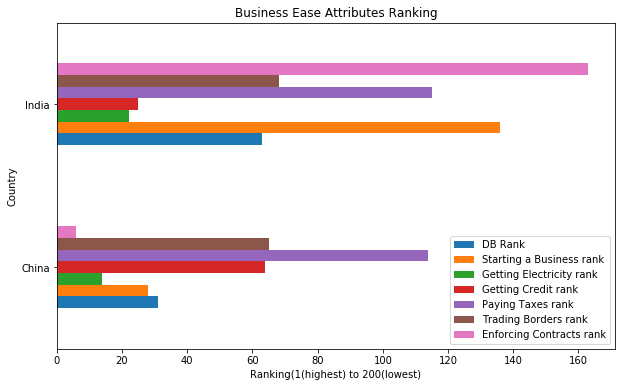

In [14]:
plt.figure()
ax3=Business.plot(kind='barh', figsize=(10, 6))
ax3.set_title('Business Ease Attributes Ranking')
ax3.set_xlabel('Ranking(1(highest) to 200(lowest)')
plt.show()

### Identify the City in both India and China and understand the similarity in city culture

As per the above bar chart in further analysis we will deep dive comparing the Cities with similar GDP across both China and India.  
Lets compare the Mumbai(India) and Shanghai(China)

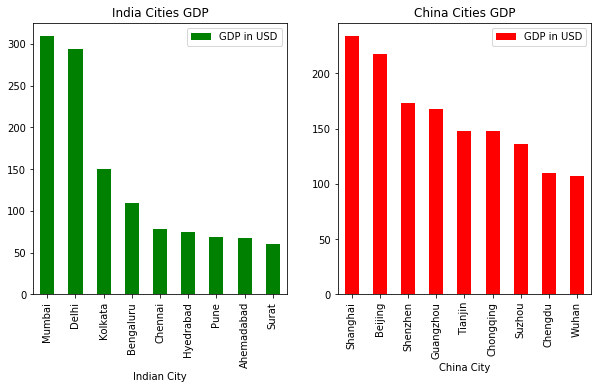

In [15]:
#Plot histogram to understand the similar city among both the country China and India
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
India_GDP.plot.bar(x='Indian City',y='GDP in USD',color='G',figsize=(10,10),title = 'India Cities GDP',ax=ax1)
China_GDP3.plot.bar(x='China City',y='GDP in USD',color='R',figsize=(10,5),title = 'China Cities GDP',ax=ax2)
plt.show()

## Compare the Notable companies among both Shanghai(China) and Mumbai(India)

In [16]:
#Load the data from the HTML link and process the data (Notable companies)
INcomp_HTML = 'https://en.wikipedia.org/wiki/List_of_companies_of_India'
CNcomp_HTML = 'https://en.wikipedia.org/wiki/List_of_companies_of_China'
#Read the HTML into the Dataframe and use the required table
INdata = pd.read_html(INcomp_HTML)
CNdata = pd.read_html(CNcomp_HTML)
INcomp = INdata[1]
CNcomp = CNdata[1]

In [17]:
#Datapreprocessing for both India and China Notable Countires
INcomp.drop(['Founded','Notes'],axis = 1,inplace=True)
CNcomp.drop(['Founded','Notes'],axis = 1,inplace=True)
INcomp['Number'] = 1
CNcomp['Number'] = 1
print('Total number of India Notable companies',INcomp.shape[0])
print('Total number of China Notable companies',CNcomp.shape[0])

Total number of India Notable companies 393
Total number of China Notable companies 183


In [18]:
#Pick the country Mumbai and Shanghai
IN_Mumbai=INcomp[(INcomp['Headquarters']=='Mumbai')]
IN_Mumbai['Country'] = 'India'
CN_Shanghai = CNcomp[(CNcomp['Headquarters']=='Shanghai')]
CN_Shanghai['Country'] = 'China'

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [19]:
#Groupby to understand the China and India by Industry Sectors
INcomp_sec_hed = INcomp[['Industry','Number']].groupby(['Industry']).sum()                
CNcomp_sec_hed = CNcomp[['Industry','Number']].groupby(['Industry']).sum() 

### Comparison of the Cities in both Shanghai and Mumbai

In [20]:
#Individual India 
INcomp_bar = INcomp[['Headquarters','Industry','Number']].groupby(['Headquarters','Industry']).sum().reset_index()
INcomp_bar.set_index('Industry',inplace=True)
#Individual China 
CNcomp_bar = CNcomp[['Headquarters','Industry','Number']].groupby(['Headquarters','Industry']).sum().reset_index() 
CNcomp_bar.set_index('Industry',inplace=True)

In [21]:
INcomp_bar10 = INcomp_bar.sort_values(by='Number',ascending=False).head(10)
CNcomp_bar10 = CNcomp_bar.sort_values(by='Number',ascending=False).head(10)

In [22]:
INcomp_bar10=INcomp_bar10.sort_values(by='Number',ascending=False)
CNcomp_bar10=CNcomp_bar10.sort_values(by='Number',ascending=False)

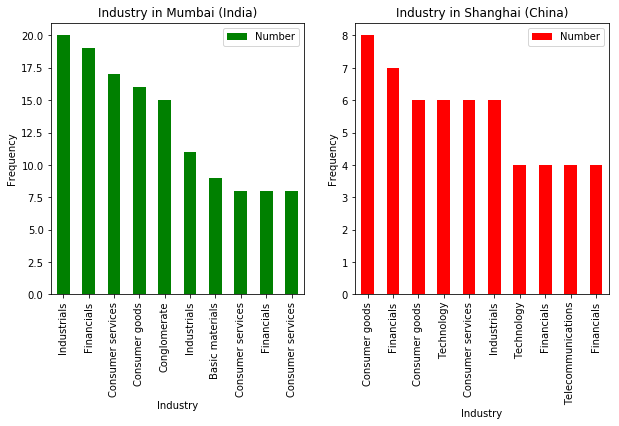

In [23]:
#Bar plot for individual country
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
#plot India
INcomp_bar10.plot.bar(figsize=(10,5),color='g',ax=ax1)
ax1.set_title('Industry in Mumbai (India)')
ax1.set_ylabel('Frequency')
#plot China
CNcomp_bar10.plot.bar(figsize=(10,5),color='r',ax=ax2)
ax2.set_title('Industry in Shanghai (China)')
ax2.set_ylabel('Frequency')
plt.show()

## Observation of India and China on Various factors

Enforcing contracts  
India’s performance is well below China’s and many other Asian countries’ when it comes to contract enforcement.  

Those raising a legal dispute in Mumbai can expect the whole process—filing suit, awaiting trial and judgement and enforcement—to take almost four years. Meanwhile, a similar dispute in Shanghai is typically resolved in about nine months.  

The estimated cost of fees associated with raising a suit in Mumbai is also twice that of raising a suit in Shanghai—31 percent of the claim value.  

The World Bank also ranks “quality of judicial process” on an 18-point scale and awarded Mumbai 10.5 points to Shanghai’s 16.5 points.   

Where India is improving  
India still lags far behind China in terms of Doing Business rank. But there are some relevant redeeming areas where the country has performed well or is improving. Obtaining credit, for example is easier in India. And India and China scored similarly in terms of getting electricity, paying taxes and cross-border trade.

Continued reforms are also improving India’s ease of doing business, including:  

Eliminating certain fees involved in registering a business
Reducing the time and cost needed to obtain construction permits; and
Enabling post-clearance audits for cross-border trade

## Venue analysis in Mumbai and Shanghai

This analysis just to check how similar both the places and soon the company can attain the full phase based on the similarity.

In [18]:
#import the required library
#import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#Install the geocoders
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.1               |             py_0          26 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    ------------------------------------------------------------
                       

In [19]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: BEGCGH411FBVK5R05FTTII4KCLM1YZB0H3U5ICVC2N4O1UZ2
CLIENT_SECRET:VGP1BCJYXPZFQFNSPODW4BZYPPYORXVJLVWR4U43MGL2YOM2


In [ ]:
#List of administrative division in Shanghai and Chennai
cn_adv = 'https://en.wikipedia.org/wiki/List_of_administrative_divisions_of_Shanghai'
in_adv = 

In [20]:
#Identifyt the Latitude and Logngitude for both the City in China and india
address1 = 'Mumbai,India'
address2 = 'Shanghai,China'

geolocator = Nominatim(user_agent="ny_expincn")
location = geolocator.geocode(address1)
in_latitude = location.latitude
in_longitude = location.longitude
print('The geograpical coordinate of Mumbai,India are {}, {}.'.format(in_latitude, in_longitude))

geolocator = Nominatim(user_agent="ny_expincn")
location = geolocator.geocode(address2)
cn_latitude = location.latitude
cn_longitude = location.longitude
print('The geograpical coordinate of Shanghai,China are {}, {}.'.format(cn_latitude, cn_longitude))

The geograpical coordinate of Mumbai,India are 18.9387711, 72.8353355.
The geograpical coordinate of Shanghai,China are 31.2322758, 121.4692071.


#### Let's create a function to repeat the same process to all the neighborhoods in Mumbai

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now, let's get the top 100 venues that are in Mumbai within a radius of 500 meters.

In [21]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [22]:
# Mumbai places
latitude = in_latitude
longitude = in_longitude
radius = 1000
LIMIT = 3000

url_in = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)



In [23]:
in_results = requests.get(url_in).json()
in_results

{'meta': {'code': 200, 'requestId': '5eb82aef542890001bff7fa4'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Mumbai',
  'headerFullLocation': 'Mumbai',
  'headerLocationGranularity': 'city',
  'totalResults': 90,
  'suggestedBounds': {'ne': {'lat': 18.94777110900001,
    'lng': 72.84483283408586},
   'sw': {'lat': 18.929771090999992, 'lng': 72.82583816591413}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4caa0096d971b1f7ccca23e1',
       'name': 'Royal China',
       'location': {'address': 'Waudby Road',
        'lat': 18.938715239156295,
        'lng': 72.83293313173236,
        'labeledLatLngs': [{'label': 'display',
          'lat': 18.938715239156295,
          'lng': 

In [24]:
in_venues = in_results['response']['groups'][0]['items']
    
in_nearby_venues = json_normalize(in_venues) # flatten JSON

# filter columns
in_filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
in_nearby_venues =in_nearby_venues.loc[:, in_filtered_columns]

# filter the category for each row
in_nearby_venues['venue.categories'] = in_nearby_venues.apply(get_category_type, axis=1)

# clean columns
in_nearby_venues.columns = [col.split(".")[-1] for col in in_nearby_venues.columns]

in_nearby_venues.head()

,name,categories,lat,lng
0,Royal China,Chinese Restaurant,18.938715,72.832933
1,Town House Cafe,Bar,18.938550,72.833464
2,Sher-E-Punjab,Indian Restaurant,18.937944,72.837853
3,Cafe Excelsior,Café,18.937701,72.833566
4,Britannia & Co.,Parsi Restaurant,18.934683,72.840183


#### Now, let's get the top 100 venues that are in Shanghai within a radius of 500 meters.

In [34]:
# Shanghai places
latitude = cn_latitude
longitude = cn_longitude
radius = 5000
LIMIT = 5000

url_cn = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)



In [35]:
cn_results = requests.get(url_cn).json()
cn_results

{'meta': {'code': 200, 'requestId': '5eb82ceabe61c9001be3947a'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Shanghai',
  'headerFullLocation': 'Shanghai',
  'headerLocationGranularity': 'city',
  'totalResults': 191,
  'suggestedBounds': {'ne': {'lat': 31.41227598000018,
    'lng': 121.67932277906385},
   'sw': {'lat': 31.05227561999982, 'lng': 121.25909142093616}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b0588c3f964a520d1d822e3',
       'name': 'Shanghai Grand Theater (上海大剧院)',
       'location': {'address': '300 Renmin Blvd',
        'lat': 31.231029885841885,
        'lng': 121.46726251773205,
        'labeledLatLngs': [{'label': 'display',
          'lat': 31.2310

In [36]:
cn_venues = cn_results['response']['groups'][0]['items']
    
cn_nearby_venues = json_normalize(cn_venues) # flatten JSON

# filter columns
cn_filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
cn_nearby_venues =cn_nearby_venues.loc[:, cn_filtered_columns]

# filter the category for each row
cn_nearby_venues['venue.categories'] = cn_nearby_venues.apply(get_category_type, axis=1)

# clean columns
cn_nearby_venues.columns = [col.split(".")[-1] for col in cn_nearby_venues.columns]

cn_nearby_venues.head()

,name,categories,lat,lng
0,Shanghai Grand Theater (上海大剧院),Theater,31.231030,121.467263
1,JW Marriott Hotel Shanghai at Tomorrow Square ...,Hotel,31.232216,121.465260
2,Homeslice,Pizza Place,31.225189,121.461093
3,Starbucks Reserve Roastery (星巴克臻选),Coffee Shop,31.232402,121.457684
4,Jing'an Sculpture Park (静安雕塑公园),Sculpture Garden,31.234794,121.463911


In [113]:
print( 'The shape of China',cn_nearby_venues.shape)
print( 'The shape of India',in_nearby_venues.shape)

The shape of China (100, 4)
The shape of India (90, 4)


### Understand the similarity between the two cities

In [24]:
cn_nearby_venues_cnt = cn_nearby_venues.groupby(['categories']).count().reset_index()

NameError: name 'cn_nearby_venues' is not defined

In [ ]:
fig = plt.figure()
ax1= fig.add_subplot(121)
cn_nearby_venues_cnt.plot(kind='bar',figsize=(15,10))
plt.show()

## Visualize the data in the map

In [47]:
# create map of Mumbai using latitude and longitude values
map_mumbai = folium.Map(location=[in_latitude, in_longitude], zoom_start=15)

# add markers to map
for lat, lng, name, categories in zip(in_nearby_venues['lat'], in_nearby_venues['lng'], in_nearby_venues['name'], in_nearby_venues['categories']):
    label = '{}, {}'.format(categories, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mumbai)

map_mumbai


In [48]:
# create map of Mumbai using latitude and longitude values
map_shanghai = folium.Map(location=[cn_latitude, cn_longitude], zoom_start=15)

# add markers to map
for lat, lng, name, categories in zip(cn_nearby_venues['lat'], cn_nearby_venues['lng'], cn_nearby_venues['name'], cn_nearby_venues['categories']):
    label = '{}, {}'.format(categories, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_shanghai)

map_shanghai

In [95]:
in_nearby_grp = in_nearby_venues.groupby('categories').count().sort_values(by='name',ascending=False)
cn_nearby_grp = cn_nearby_venues.groupby('categories').count().sort_values(by='name',ascending=False)
print('There are {} uniques categories in China.'.format(len(cn_nearby_venues['categories'].unique())))
print('There are {} uniques categories in India.'.format(len(in_nearby_venues['categories'].unique())))

There are 47 uniques categories in China.
There are 44 uniques categories in India.


## Cluster Mumbai and Shanghai based on the category

In [96]:
# set number of clusters
kclusters = 5

in_nearby_clust = in_nearby_grp.drop(['lat','lng'], 1)
cn_nearby_clust = cn_nearby_grp.drop(['lat','lng'], 1)
# run k-means clustering
in_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(in_nearby_clust)
cn_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cn_nearby_clust)

# check cluster labels generated for each row in the dataframe
in_kmeans.labels_[0:10] 

array([0, 3, 3, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [97]:
in_nearby_clust['cluster_label'] = in_kmeans.labels_
cn_nearby_clust['cluster_label'] = cn_kmeans.labels_
cn_nearby_clust.reset_index().head(5)

,categories,name,cluster_label
0,Hotel,22,1
1,Bakery,5,3
2,Shopping Mall,5,3
3,Dumpling Restaurant,5,3
4,French Restaurant,4,2


In [98]:
in_mumbai_map = pd.merge(left=in_nearby_venues, right=in_nearby_clust, how='left', left_on='categories', right_on='categories')
cn_mumbai_map = pd.merge(left=cn_nearby_venues, right=cn_nearby_clust, how='left', left_on='categories', right_on='categories')
in_mumbai_map.drop('name_y',1,inplace=True)
cn_mumbai_map.drop('name_y',1,inplace=True)

In [100]:
# create map of Mumbai using latitude and longitude values
map_mumbai = folium.Map(location=[in_latitude, in_longitude], zoom_start=15)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, name, categories,cluster in zip(in_mumbai_map['lat'], in_mumbai_map['lng'], in_mumbai_map['name_x'], in_mumbai_map['categories'],in_mumbai_map['cluster_label']):
    label = '{}, {}'.format(categories, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7,
        parse_html=False).add_to(map_mumbai)

map_mumbai

In [112]:
# create map of Mumbai using latitude and longitude values
map_shanghai2 = folium.Map(location=[cn_latitude, cn_longitude], zoom_start=14)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, name, categories,cluster in zip(cn_mumbai_map['lat'], cn_mumbai_map['lng'], cn_mumbai_map['name_x'], cn_mumbai_map['categories'],cn_mumbai_map['cluster_label']):
    label = '{}, {}'.format(categories, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7,
        parse_html=False).add_to(map_shanghai2)

map_shanghai2

## Observation

The compostiton of both the cities Mumbai(India) and Shanghai(China) looks more similar and hence the business can easily adapt to the new environment.


## Conclusion

In conclusion, both countries provide solutions for different manufacturing needs, and there are a lot of factors to consider such as pricing, logistics, product expertise, foreign language and manufacturing processes. One should account for all factors that will affect their own specific product and circumstances and determine the best location for manufacturing when choosing between India and China.

Conclusion
The manufacturing and trade landscapes differ greatly between India and China. India’s comparatively low wages make it a much more cost-effective place to manufacture certain types of products.

On the other hand, India’s inferior infrastructure and tedious regulatory environment can give the most patient importers a migraine.

No two buyers are the same. As an importer, your success depends upon accounting for all factors that will affect your own specific product and customers. And as the China-U.S. trade war continues, you must remain flexible and attuned to changes.